<a href="https://colab.research.google.com/github/bebechien/pighouse/blob/master/shinyunbok_xl_turbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shin Yun-bok painting generator XL Turbo

This note uses diffusers & a custom model trained with the style of famous Korean ink wash painter, Shin Yun-Bok. https://civitai.com/models/29555/shinyunbok-lora

### Step 1. Install requirements

In [ ]:
!pip install --upgrade -q diffusers accelerate transformers safetensors xformers

### Step 2. Clone diffusers, build the pipeline and define image grid function

In [ ]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers

import torch
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16", use_safeTensors=True).to("cuda")
pipe.enable_xformers_memory_efficient_attention()
pipe.load_lora_weights("bebechien/shinyunbok", weight_name="shinyunbok_lora_sdxl_beta.safetensors")

from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

### Step 3. Generate images (you might want to change **"your_prompt"** string)

  0%|          | 0/1 [00:00<?, ?it/s]

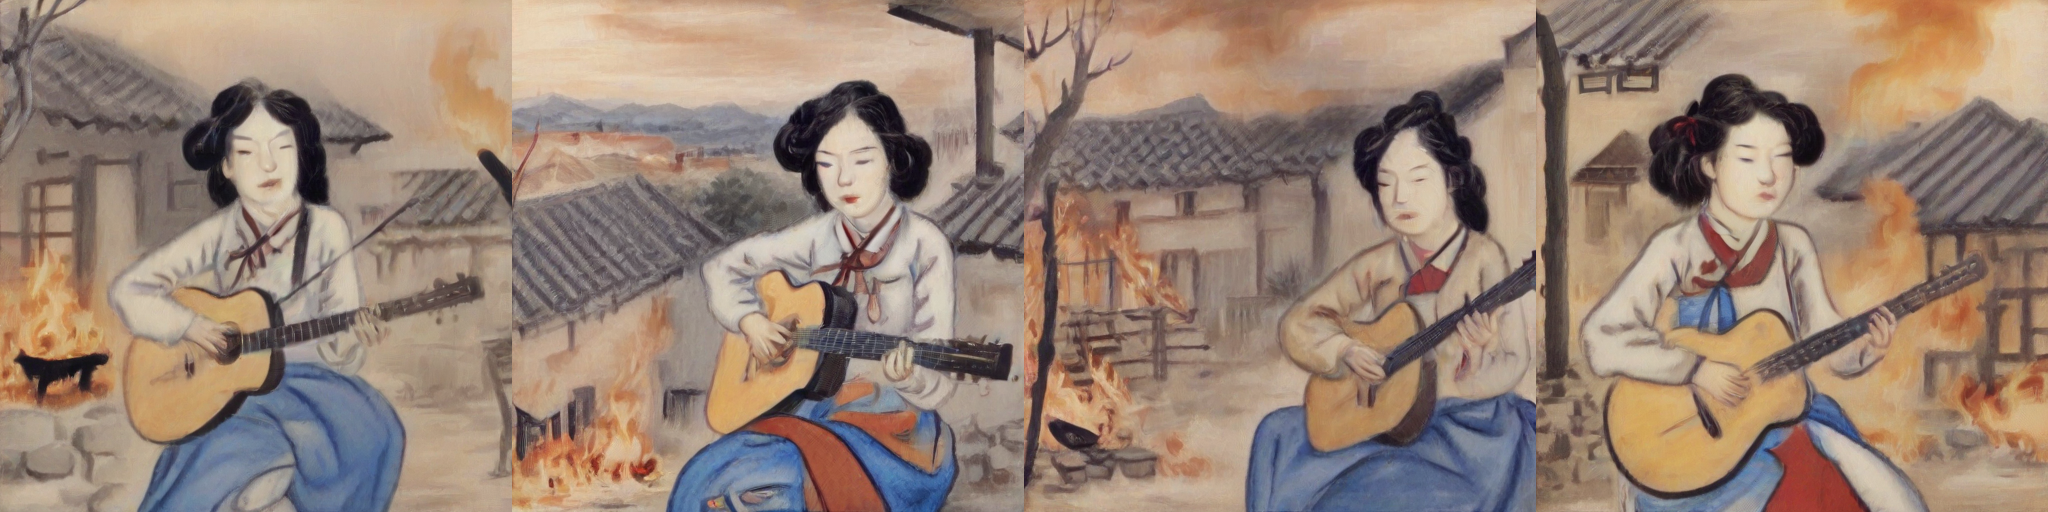

In [9]:
your_prompt = "a girl playing guitar, burning house in the background"
width = 512
height = 512
num_images = 4

images = pipe("shinyunbok painting, "+your_prompt, width=width, height=height, num_images_per_prompt=num_images, num_inference_steps=1, guidance_scale=1).images
grid = image_grid(images, rows=1, cols=4)
grid
